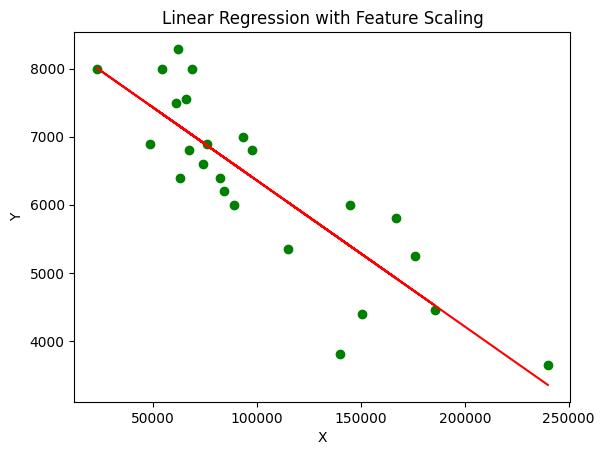

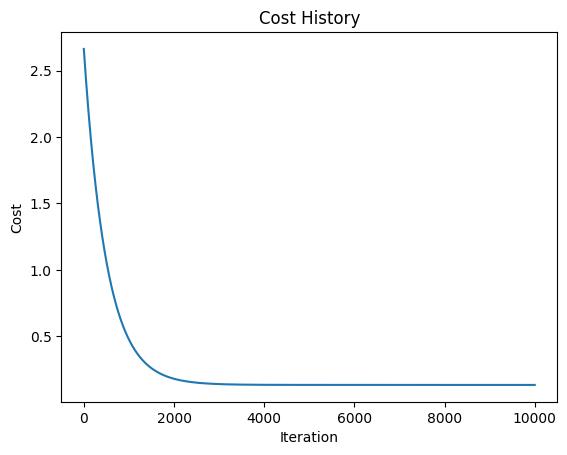

In [46]:
import numpy as np
import csv
import matplotlib.pyplot as plt

def feature_scaling(X, y):
    # average number of kilometers
    # Calculate mean along the rows (axis=0)
    mean_X = np.mean(X, axis=0)
    # Standard deviation => the amount of variability or dispersion in the data. 
    # A higher standard deviation means the values are more spread out from the mean.
    std_X = np.std(X, axis=0)
    
    # Check for zero standard deviation to avoid division by zero
    std_X[std_X == 0] = 1.0

    #feature scaling => so that scaled value has a mean of 0 and a standard deviation of 1
    # the mean of x becomes 0 in x_scaled
    X_scaled = (X - mean_X) / std_X
    
    mean_y = np.mean(y)
    std_y = np.std(y)
    
    # Check for zero standard deviation to avoid division by zero
    std_y = 1.0 if std_y == 0 else std_y
    
    y_scaled = (y - mean_y) / std_y
    
    return X_scaled, y_scaled, mean_X, std_X, mean_y, std_y

def model(X, theta):
    return X.dot(theta)

def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

# # Coefficient of determination (the closest to 1 the better) - methode de moindre carre
# def coef_determination(y, pred):
#     mean_y = np.mean(y)
#     u = ((y - pred)**2).sum()
#     v = ((y - mean_y)**2).sum()
#     return 1 - (u / v)

def plot_results(X_vector, Y_vector, predictions):
    plt.scatter(X_vector, Y_vector, c='g')
    plt.plot(X_vector, predictions, c='r')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Linear Regression with Feature Scaling')
    plt.show()

def plot_cost_history(cost_history):
    plt.plot(range(len(cost_history)), cost_history)
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.title('Cost History')
    plt.show()

# # R-squared represents the proportion of the dependent variable's variance 
# # that is explained by the independent variable(s)
# def plot_coefficient_of_determination(r_squared):
#     labels = ['Explained Variance (R-squared)', 'Unexplained Variance']
#     values = [r_squared, 1 - r_squared]
#     colors = ['lightcoral', 'lightskyblue']

#     plt.bar(labels, values, color=colors)
#     plt.ylabel('Proportion')
#     plt.title('Coefficient of Determination (R-squared)')
#     plt.ylim(0, 1)  # Set y-axis limits to represent proportions
#     plt.show()
    
def load_data(file_name):
   dataset = []
   with open(file_name, 'r') as file:
       reader = csv.reader(file)
       header = next(reader)
       if not header:
           raise ValueError("Error: The CSV file is empty.")
       
       for row in reader:
           if not row:
               raise ValueError("Error: The CSV file contains empty rows.")
           
           # Ensure the row contains valid numbers
           try:
               dataset.append([float(row[0]), float(row[1])])
           except ValueError:
               raise ValueError("Error: The CSV file contains non-numeric values.")

   if not dataset:
       raise ValueError("Error: No valid data found in the CSV file.")

   return dataset

def preprocess_data(dataset):
   data_array = np.array(dataset)

   X_vector = data_array[:, 0]
   Ones_vector = np.ones(X_vector.shape)
   X_matrix = np.column_stack((X_vector, Ones_vector))
   Y_vector = data_array[:, 1]
   Y_vector = Y_vector.reshape(Y_vector.shape[0], 1)

   # Feature scaling
   X_scaled, Y_scaled, mean_X, std_X, mean_Y, std_Y = feature_scaling(X_matrix, Y_vector)

   # Initialize random theta
   theta = np.random.randn(2, 1)

   return X_scaled, Y_scaled, theta, mean_X, std_X, mean_Y, std_Y, X_vector, Y_vector

def run_model(X_scaled, Y_scaled, theta, std_Y, mean_Y):
 # Run gradient descent
 final_theta, cost_history = gradient_descent(X_scaled, Y_scaled, theta, learning_rate=0.001, n_iterations=10000)

 # Make predictions
 predictions_scaled = model(X_scaled, final_theta)
 predictions = predictions_scaled * std_Y + mean_Y

 return final_theta, cost_history, predictions


def save_model(final_theta, mean_X, std_X, mean_Y, std_Y, file_name):
   with open(file_name, 'w') as file:
       for val in final_theta:
           file.write(f"{val[0]}\n")
       file.write(f"{mean_X[0]}\n")
       file.write(f"{std_X[0]}\n")
       file.write(f"{mean_Y}\n")
       file.write(f"{std_Y}\n")

def save_predictions(Y_vector, predictions):
    with open("predictions.txt", 'w') as file:
        file.write(f"{Y_vector}\n")
        file.write(f"{predictions}\n")

def main():
   try:
       dataset = load_data('data.csv')
       X_scaled, Y_scaled, theta, mean_X, std_X, mean_Y, std_Y, X_vector, Y_vector = preprocess_data(dataset)
       final_theta, cost_history, predictions = run_model(X_scaled, Y_scaled, theta, std_Y, mean_Y)

       #  # Coefficient of determination
       # r_squared = coef_determination(Y_vector, predictions)
       # rounded_r_squared = round(r_squared, 4)
       
       # Plotting
       plot_results(X_vector, Y_vector, predictions)
       plot_cost_history(cost_history)
       # plot_coefficient_of_determination(rounded_r_squared)
       # print(f"Coefficient of determination: {rounded_r_squared}")
       
       # Save theta + scaled var in txt to be retrieved by the predict program
       save_model(final_theta, mean_X, std_X, mean_Y, std_Y, 'linear_regression_model.txt')
       save_predictions(Y_vector, predictions)

   except FileNotFoundError:
       print("Error: The file 'data.csv' was not found.")
   except ValueError as ve:
       print(f"Error: {ve}")

if __name__ == "__main__":
    main()
    

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import ast

def load_predictions(file_path):
 with open(file_path, 'r') as file:
     data = file.read()
     data = ast.literal_eval(data)
     Y_vector = np.array(data[0])
     predictions = np.array(data[1])
     return Y_vector, predictions

# Coefficient of determination (the closest to 1 the better) - methode de moindre carre
def coef_determination(y, pred):
    mean_y = np.mean(y)
    u = ((y - pred)**2).sum()
    v = ((y - mean_y)**2).sum()
    return 1 - (u / v)

# R-squared represents the proportion of the dependent variable's variance 
# that is explained by the independent variable(s)
def plot_coefficient_of_determination(r_squared):
    labels = ['Explained Variance (R-squared)', 'Unexplained Variance']
    values = [r_squared, 1 - r_squared]
    colors = ['lightcoral', 'lightskyblue']

    plt.bar(labels, values, color=colors)
    plt.ylabel('Proportion')
    plt.title('Coefficient of Determination (R-squared)')
    plt.ylim(0, 1)  # Set y-axis limits to represent proportions
    plt.show()

def main():
   try:
       # Coefficient of determination
       Y_vector, predictions = load_predictions('predictions.txt')
       r_squared = coef_determination(Y_vector, predictions)
       plot_coefficient_of_determination(r_squared)
       rounded_r_squared = round(r_squared, 4)
       print(f"Rounded R-squared: {rounded_r_squared}")
   except ValueError as ve:
       print(ve)

if __name__ == "__main__":
    main()

SyntaxError: invalid syntax (<unknown>, line 25)